In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud 

In [18]:
# Information is gained from all popular courses in all categories

# Import dataset and check basic information
df = pd.read_csv('all_coursera_results.csv').drop_duplicates()
df.head()

,name,category,sub-category,provider,overall,enrolled,about,subtitles,skills,url
0,Introduction to Philosophy,Philosophy,Arts and Humanities,The University of Edinburgh,4.6,285712,"111,820 This course will introduce you to som...","English, Hebrew",NaN,https://www.coursera.org/learn/philosophy
1,Think Again I: How to Understand Arguments,Philosophy,Personal Development,Duke University,4.6,139699,"65,149 How to Understand Arguments\n\nThink A...","Arabic, Ukrainian, Chinese (Simplified), Itali...",Evaluation Interpretation Language Linguistics,https://www.coursera.org/learn/understanding-a...
2,De-Mystifying Mindfulness,Philosophy,Personal Development,Universiteit Leiden,4.8,109064,"80,498 Interest in meditation, mindfulness, a...",English,Philosophy Gratitude Mindfulness Meditation,https://www.coursera.org/learn/mindfulness
3,Greek and Roman Mythology,Philosophy,Arts and Humanities,University of Pennsylvania,4.8,92830,"59,950 Myths are traditional stories that hav...","English, Romanian, Chinese (Simplified)",Art History Greek Mythology History Mythology,https://www.coursera.org/learn/mythology
4,Pensamiento Cient0102fico,Philosophy,Arts and Humanities,Universidad Nacional Aut0106noma de M0108xico,4.7,77695,"49,777 0007El pensamiento cient0102fico es s0...",Spanish Subtitles: Spanish,NaN,https://www.coursera.org/learn/ciencia


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452 entries, 0 to 451
Data columns (total 10 columns):
name            452 non-null object
category        452 non-null object
sub-category    452 non-null object
provider        428 non-null object
overall         451 non-null float64
enrolled        452 non-null int64
about           452 non-null object
subtitles       452 non-null object
skills          272 non-null object
url             452 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 38.8+ KB


In [20]:
# Deal with the missing values
df['skills'] = df[['skills']].fillna(value='unknown')
df['about'] = df[['about']].fillna(value='unknown')
df['name'] = df[['name']].fillna(value='unknown')
df['provider'] = df[['provider']].fillna(value='unknown')
df['overall'] = df[['overall']].fillna(value=4.0)

In [21]:
df.describe()

,overall,enrolled
count,452.000000,4.520000e+02
mean,4.661062,7.759234e+04
std,0.188674,1.161357e+05
min,3.400000,4.720000e+02
25%,4.600000,1.553675e+04
50%,4.700000,4.781800e+04
75%,4.800000,9.364600e+04
max,5.000000,1.752978e+06


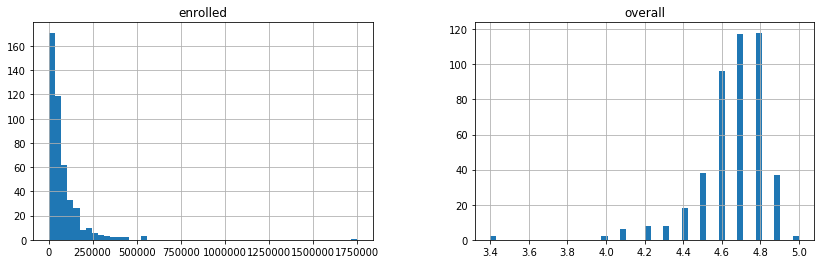

In [22]:
# Histogram of overall ratings and enrolled number of all popular courses
df.hist(bins=50, figsize=(14,4))
plt.show()

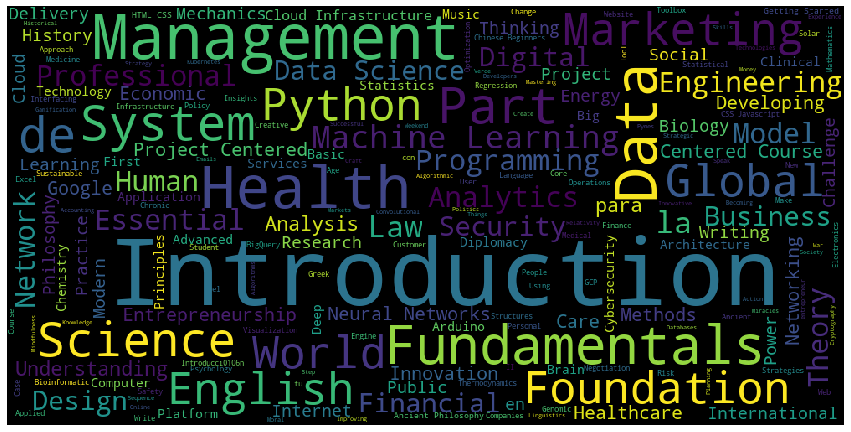

In [23]:
#Word Cloud of courses
list_word = df['name'].values.tolist()
all_words = (" ").join(list_word)
wordcloud = WordCloud(width = 1000, height = 500).generate(all_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

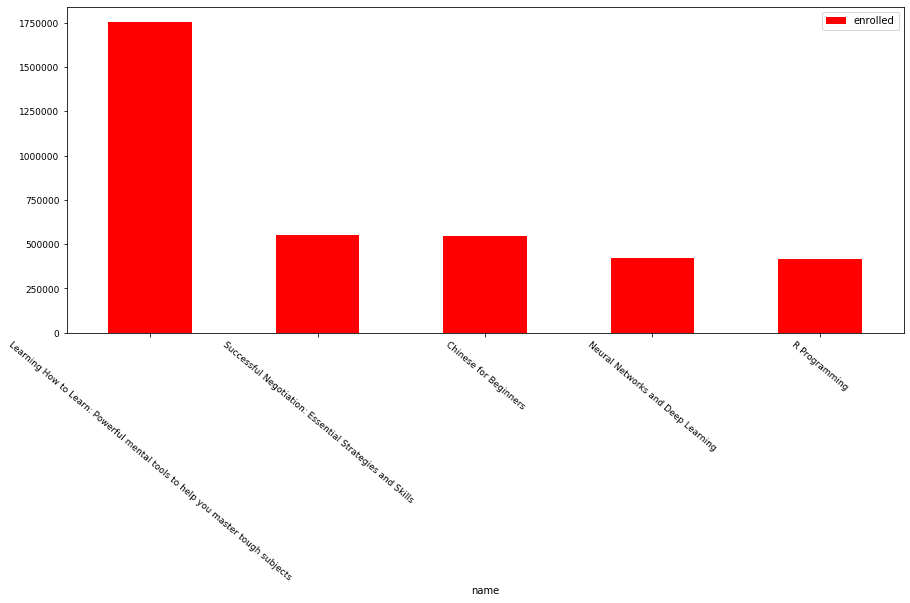

In [47]:
#Statistic of top 10 courses that have largest enrolled numbers
df.drop_duplicates(subset='name', keep="first").sort_values(by="enrolled" , ascending=False)[0:5].plot.bar(x = 'name', 
                                                            y='enrolled', figsize=(15,6),color='red',rot=-40, fontsize =9)

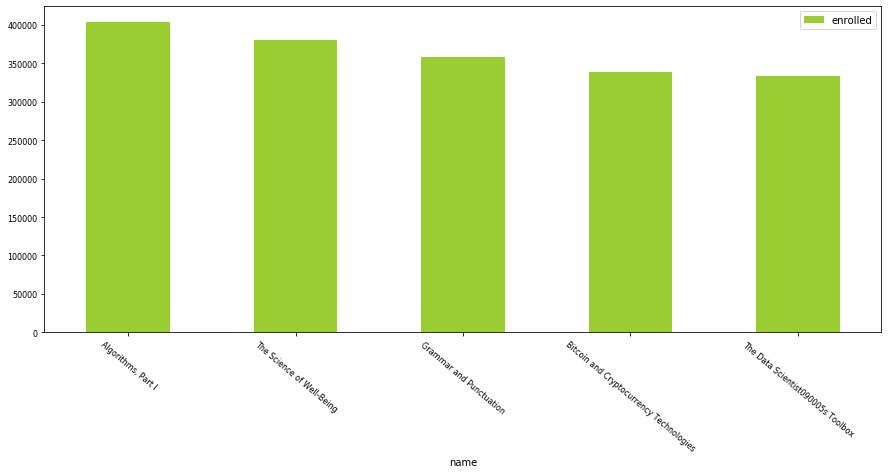

In [48]:
df.drop_duplicates(subset='name', keep="first").sort_values(by="enrolled" , ascending=False)[5:10].plot.bar(x = 'name', 
                                                            y='enrolled', figsize=(15,6),color='yellowgreen',rot=-40, fontsize =8)

In [136]:
# Check the category and assgin them into different topics
df.groupby(['category']).agg(['mean', 'count'])

overall             enrolled      
                                              mean count           mean count
category                                                                     
Algorithms                                4.825000     8  215467.000000     8
Animal Health                             4.783333     6   14346.000000     6
Basic Science                             4.675000    12   68385.083333    12
Business Essentials                       4.611111     9  226941.444444     9
Business Strategy                         4.588889     9  117911.111111     9
Chemistry                                 4.625000    12   27932.250000    12
Cloud Computing                           4.630000    10   44298.200000    10
Computer Security and Networks            4.637500     8  135815.750000     8
Data Analysis                             4.611111     9  240785.777778     9
Data Management                           4.663636    11    6541.818182    11
Design and Product                        4.671429     7   95934.285714     7
Economics                                 4.716667    12  110440.916667    12
Education                                 4.681818    11   46983.000000    11
Electrical Engineering                    4.650000    12   55344.916667    12
Entrepreneurship                          4.455556     9   58141.888889     9
Environmental Science and Sustainability  4.718182    11   55383.727273    11
Finance                                   4.640000    10   95283.700000    10
Governance and Society                    4.636364    11   57650.272727    11
Health Informatics                        4.483333    12   13198.416667    12
Healthcare Management                     4.675000    12    5434.333333    12
History                                   4.727273    22  239533.000000    22
Law                                       4.758333    12   41256.666667    12
Leadership and Management                 4.533333     9  112040.222222     9
Learning English                          4.728571     7  111049.714286     7
Machine Learning                          4.750000    10  162488.400000    10
Marketing                                 4.620000    10   97154.100000    10
Mechanical Engineering                    4.741667    12   54368.916667    12
Mobile and Web Development                4.383333     6  143617.333333     6
Music and Art                             4.722222     9  121277.444444     9
Networking                                4.681818    11    7808.454545    11
Nutrition                                 4.654545    11    6274.090909    11
Other Languages                           4.700000     9   48948.111111     9
Patient Care                              4.683333    12   27053.166667    12
Philosophy                                4.666667    12   90441.666667    12
Physics and Astronomy                     4.658333    12   25722.166667    12
Probability and Statistics                4.591667    12   76525.166667    12
Psychology                                4.745455    11   88793.636364    11
Public Health                             4.666667    12   17576.916667    12
Research                                  4.733333    12    4319.416667    12
Research Methods                          4.575000    12    8684.416667    12
Security                                  4.618182    11    6872.909091    11
Software Development                      4.742857     7  207371.428571     7
Support and Operations                    4.650000    10   25722.400000    10

In [115]:
# Assign topics to six main fields
Nat_sci = ['Basic Science','Chemistry','Environmental Science and Sustainability','Physics and Astronomy','Research',
          'Research Methods']
Bus = ['Business Essentials','Business Strategy','Economics','Entrepreneurship','Finance','Leadership and Management',
      'Marketing','Support and Operations']
Math_com = ['Algorithms','Cloud Computing','Computer Security and Networks','Data Analysis','Data Management',
           'Machine Learning','Mobile and Web Development','Networking','Probability and Statistics','Software Development']
Engin = ['Electrical Engineering','Mechanical Engineering','Security']
Health = ['Animal Health','Health Informatics','Healthcare Management','Nutrition','Patient Care','Public Health']
Lib_arts = ['Design and Product','Education','Governance and Society','History','Law','Learning English','Music and Art',
           'Other Languages','Philosophy','Psychology']

In [129]:
def assign_topic():
    temp = df.copy()
    temp['topic'] = None
    for i in range(len(temp['name'])):
        if temp['category'][i] in Nat_sci:
            temp['topic'][i] = 'Nature Science'
        if temp['category'][i] in Bus:
            temp['topic'][i] = 'Business'
        if temp['category'][i] in Math_com:
            temp['topic'][i] = 'Math and Computer Science'
        if temp['category'][i] in Engin:
            temp['topic'][i] = 'Engineering'
        if temp['category'][i] in Health:
            temp['topic'][i] = 'Health'     
        if temp['category'][i] in Lib_arts:
            temp['topic'][i] = 'Language, Arts and Social'
    return temp

In [130]:
new = assign_topic()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the C

In [132]:
new.to_csv('cleaned_data.csv')

In [131]:
new.groupby(['topic']).agg(['mean', 'count'])

overall             enrolled      
                               mean count           mean count
topic                                                         
Business                   4.607692    78  104387.243590    78
Engineering                4.671429    35   39776.228571    35
Health                     4.646154    65   14065.307692    65
Language, Arts and Social  4.706306   111  107736.216216   111
Math and Computer Science  4.656522    92  113420.206522    92
Nature Science             4.663380    71   31404.802817    71